In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os

In [13]:
# Paths
DATA_DIR = "../data/data1"   # contains "AI" and "real" subfolders
BATCH_SIZE = 32
IMG_SIZE = (224, 224)

In [14]:
# Load dataset
train_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    DATA_DIR,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

Found 971 files belonging to 2 classes.
Using 777 files for training.
Found 971 files belonging to 2 classes.
Using 194 files for validation.


In [7]:
# Prefetch for performance
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
# Build model using Transfer Learning
base_model = MobileNetV2(input_shape=IMG_SIZE + (3,),
                         include_top=False,
                         weights='imagenet')

base_model.trainable = False  # freeze base model

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
# Add custom layers
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(1, activation='sigmoid')  # binary classification
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [10]:
# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=5
)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 51s 943ms/step - accuracy: 0.5354 - loss: 0.7512 - val_accuracy: 0.6340 - val_loss: 0.6276
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 745ms/step - accuracy: 0.5611 - loss: 0.6929 - val_accuracy: 0.6649 - val_loss: 0.6013
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 722ms/step - accuracy: 0.6306 - loss: 0.6475 - val_accuracy: 0.6753 - val_loss: 0.5841
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 734ms/step - accuracy: 0.6113 - loss: 0.6605 - val_accuracy: 0.6701 - val_loss: 0.5755
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 734ms/step - accuracy: 0.6435 - loss: 0.6113 - val_accuracy: 0.6753 - val_loss: 0.6044


In [11]:
# Save model
os.makedirs("models", exist_ok=True)
model.save("models/classifier.h5")

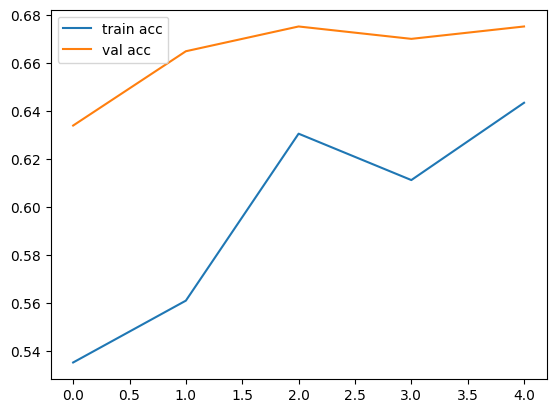

In [12]:
# Plot accuracy & loss
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()